In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist, squareform


# CC Library
What are the Hamming distances between designed tiles?

In [ ]:
design_file = pd.read_csv("../data/DNA_Tiles_nkx2_2.txt",header=None)
design_file

,0
0,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...
1,TACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCG...
2,GACCAGAGCAACAGAGCCGGCACCTTCCAGGCCGGCATTCCCTTCA...
3,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...
4,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...
...,...
230,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...
231,ACCGACGCCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...
232,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...
233,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...


In [146]:
# def add_min_hamming_dist(seq_list):
#     # Step 1: Convert to 2D char array
#     seq_array = np.array([list(seq) for seq in seq_list])

#     # Step 2: Compute pairwise Hamming distances
#     dist_matrix = pdist(seq_array, metric=lambda u, v: np.sum(u != v))
#     dist_matrix_square = squareform(dist_matrix)

#     # Step 3: Set diagonal to inf and compute minimum per sequence
#     np.fill_diagonal(dist_matrix_square, np.inf)
#     min_pairwise_distances = np.min(dist_matrix_square, axis=1)

#     # Step 4: Combine tiles and min distances into a DataFrame
#     df = pd.DataFrame({
#         'Tile': seq_list,
#         'Min_Hamming_Distance': min_pairwise_distances
#     })

#     return df

In [153]:
# def hamming_distance(seq1, seq2):
#     """Compute Hamming distance between two equal-length sequences."""
#     return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

# def add_min_hamming_dist(query_seqs, ref_seqs=None, n_jobs=-1, batch_size=100):
#     """
#     Compute the minimum Hamming distance for each sequence in query_seqs 
#     against all sequences in ref_seqs (or within query_seqs if ref_seqs is None).

#     Args:
#         query_seqs (list[str]): Sequences to evaluate.
#         ref_seqs (list[str] | None): Reference sequences. If None, use query_seqs.
#         n_jobs (int): Number of parallel jobs (default = -1, all cores).
#         batch_size (int): Chunk size for parallelization.

#     Returns:
#         pd.DataFrame: query sequence + min hamming distance.
#     """
#     if ref_seqs is None:
#         ref_seqs = query_seqs
    
#     # Ensure array format
#     query_seqs = np.array(query_seqs)
#     ref_seqs = np.array(ref_seqs)

#     def min_dist_for_seq(seq, ref_seqs):
#         dists = (hamming_distance(seq, ref) for ref in ref_seqs if ref != seq)
#         return min(dists, default=np.inf)

#     # Parallel with progress bar
#     results = Parallel(n_jobs=n_jobs, batch_size=batch_size)(
#         delayed(min_dist_for_seq)(seq, ref_seqs) for seq in tqdm(query_seqs, desc="Computing min Hamming")
#     )

#     return pd.DataFrame({
#         "Tile": query_seqs,
#         "Min_Hamming_Distance": results
#     })

In [157]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from rapidfuzz.distance import Hamming

def add_min_hamming_dist(query_seqs, ref_seqs=None, batch_size=1000):
    """
    Compute the minimum Hamming distance for each sequence in query_seqs
    against all sequences in ref_seqs (or within query_seqs if ref_seqs is None).

    Args:
        query_seqs (list[str]): Sequences to evaluate.
        ref_seqs (list[str] | None): Reference sequences. If None, use query_seqs.
        batch_size (int): Number of queries to process at once.

    Returns:
        pd.DataFrame: query sequence + min hamming distance.
    """
    if ref_seqs is None:
        ref_seqs = query_seqs

    query_seqs = np.array(query_seqs, dtype="U")
    ref_seqs = np.array(ref_seqs, dtype="U")

    results = []
    for i in tqdm(range(0, len(query_seqs), batch_size), desc="Computing min Hamming"):
        batch = query_seqs[i:i+batch_size]
        for q in batch:
            dists = (Hamming.distance(q, r) for r in ref_seqs if r != q)
            results.append(min(dists, default=np.inf))

    return pd.DataFrame({
        "Tile": query_seqs,
        "Min_Hamming_Distance": results
    })


In [161]:
EC_design_file = pd.read_csv("../data/a10_designfile.csv")
EC_design_file

,ArrayDNA
0,ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...
1,GAAGTTTATAATAGAATTGAATCTTCTACTGCTTCTACTGCTTTGC...
2,ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...
3,GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...
4,CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...
...,...
20778,GCTAAAGTTGATACTGAAGAAGAAGATAAGACTATGGTTGATTCTA...
20779,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...
20780,ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...
20781,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...


In [162]:
# How similar are Emily's sequences to one another?
EC_df = add_min_hamming_dist(EC_design_file["ArrayDNA"])
EC_df

Computing min Hamming: 100%|██████████| 21/21 [01:42<00:00,  4.88s/it]


,Tile,Min_Hamming_Distance
0,ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...,58
1,GAAGTTTATAATAGAATTGAATCTTCTACTGCTTCTACTGCTTTGC...,49
2,ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...,39
3,GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...,28
4,CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...,16
...,...,...
20778,GCTAAAGTTGATACTGAAGAAGAAGATAAGACTATGGTTGATTCTA...,52
20779,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,8
20780,ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...,13
20781,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,2


In [170]:
EC_df.to_csv("../data/EC_design_file_hamming_dist.csv")

In [ ]:
# 90% of sequences in Emily's library have a minimum hamming distance over 6
EC_df[EC_df["Min_Hamming_Distance"] > 6]

,Tile,Min_Hamming_Distance
0,ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...,58
1,GAAGTTTATAATAGAATTGAATCTTCTACTGCTTCTACTGCTTTGC...,49
2,ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...,39
3,GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...,28
4,CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...,16
...,...,...
20777,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,53
20778,GCTAAAGTTGATACTGAAGAAGAAGATAAGACTATGGTTGATTCTA...,52
20779,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,8
20780,ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...,13


In [163]:
EC_df["Min_Hamming_Distance"].value_counts()

Min_Hamming_Distance
58    656
59    630
57    629
56    603
55    596
     ... 
63    169
64     84
65     33
66     21
67      6
Name: count, Length: 67, dtype: int64

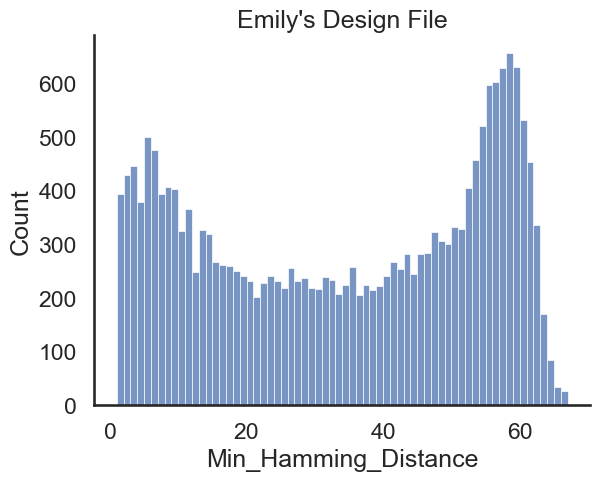

In [176]:
import matplotlib.pyplot as plt
plt.title("Emily's Design File")
sns.histplot(EC_df["Min_Hamming_Distance"], binwidth = 1)
sns.despine()

In [165]:
CC_df = add_min_hamming_dist(design_file[0])
CC_df


Computing min Hamming:   0%|          | 0/1 [00:00<?, ?it/s]

Computing min Hamming: 100%|██████████| 1/1 [00:00<00:00, 36.78it/s]


,Tile,Min_Hamming_Distance
0,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1
1,TACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCG...,92
2,GACCAGAGCAACAGAGCCGGCACCTTCCAGGCCGGCATTCCCTTCA...,8
3,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...,10
4,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,12
...,...,...
230,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
231,ACCGACGCCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,18
232,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
233,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,74


In [166]:
CC_df[CC_df["Min_Hamming_Distance"] > 3]

,Tile,Min_Hamming_Distance
1,TACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCG...,92
2,GACCAGAGCAACAGAGCCGGCACCTTCCAGGCCGGCATTCCCTTCA...,8
3,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...,10
4,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,12
5,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,13
...,...,...
230,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
231,ACCGACGCCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,18
232,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
233,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,74


In [167]:
CC_df["Min_Hamming_Distance"].value_counts()

Min_Hamming_Distance
2     74
1     25
4     22
50    21
3     13
6     11
10    10
5     10
12     8
9      5
16     4
7      4
8      4
15     3
18     3
14     3
13     3
76     2
20     2
11     2
92     1
46     1
17     1
66     1
74     1
65     1
Name: count, dtype: int64

In [ ]:
# Only 25% of sequences in Caitlin's design file have hamming distance over 6
CC_df[CC_df["Min_Hamming_Distance"] > 6]

,Tile,Min_Hamming_Distance
1,TACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCG...,92
2,GACCAGAGCAACAGAGCCGGCACCTTCCAGGCCGGCATTCCCTTCA...,8
3,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...,10
4,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,12
5,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,13
...,...,...
230,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
231,ACCGACGCCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,18
232,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,11
233,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,74


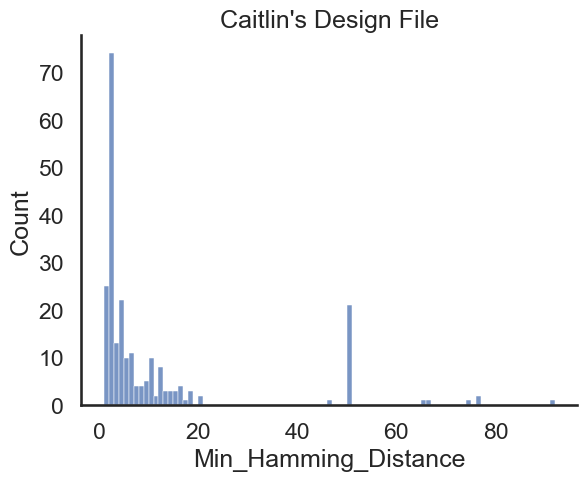

In [177]:
plt.title("Caitlin's Design File")
sns.histplot(CC_df["Min_Hamming_Distance"], binwidth = 1)
sns.despine()

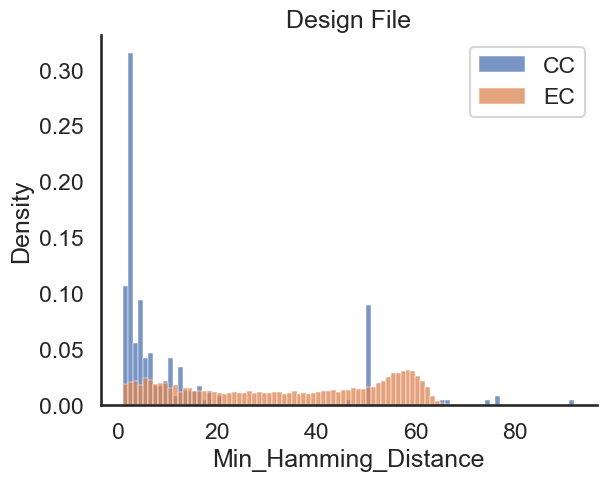

In [180]:
plt.title("Design File")
sns.histplot(CC_df["Min_Hamming_Distance"], binwidth = 1, stat = 'density', label = "CC")
sns.histplot(EC_df["Min_Hamming_Distance"], binwidth = 1, stat = 'density', label = "EC")
plt.legend()
sns.despine()

Does each AD have only 1 Hawkins BC?

In [104]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
from dask.diagnostics import ProgressBar
import duckdb

os.chdir("../scripts")
from mapping import BarcodeMapper
from map_refiner import MapRefiner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
mapper = BarcodeMapper(['../data/Staller_Tl4s1_MVS_0035_I1TTGTCACCAA_CGCACGAACA_S326.fastq.gz.assembled.fastq'],
                        "../data/DNA_Tiles_nkx2_2.txt",
                        ["ADBC2", "HawkBCs", "RTBC", "AD"],
                        ["CTCGAGATAACTTCGTATAATGTATGCTAT", "GAGCTCGCTAGC", "GGCCGGCCATAGGGCCCC", "CACCATG"],
                        ["GGCCGGCCATAGGGCCCC", "CTCGAGATAA", "GCGGTCCA", "GGATCCG"],
                        [6, 9, 16, 162],
                      reverse_complement=False)
mapped_df = mapper.create_map()
mapped_df.head()

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
0,NaN,False,NaN,False,NaN,False,NaN,False,0.0
1,NaN,False,ACCAAGATC,True,NaN,False,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,0.0
2,NaN,False,NaN,False,NaN,False,NaN,False,0.0
3,NaN,False,NaN,False,NaN,False,NaN,False,0.0
4,NaN,False,NaN,False,NaN,False,NaN,False,0.0


In [106]:
mapper.save_parquet('../output/CC_nkx2_2.parquet')

[########################################] | 100% Completed | 948.31 ms


In [107]:
refiner = MapRefiner(db_path = "../duckdb/CC_nkx2_2",
                      cols = ["ADBC2", "HawkBCs", "RTBC", "AD"],
                     reads_threshold = 5,
                     column_pairs = [("AD", ("ADBC2", "HawkBCs")), (("ADBC2", "HawkBCs"), "RTBC")])

In [108]:
refiner.create_map1_initial('../output/CC_nkx2_2.parquet/*')
initial = refiner.get_map_df('map1_initial')
initial

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
0,None,False,None,False,None,False,None,False,0
1,None,False,ACCAAGATC,True,None,False,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,0
2,None,False,None,False,None,False,None,False,0
3,None,False,None,False,None,False,None,False,0
4,None,False,None,False,None,False,None,False,0
...,...,...,...,...,...,...,...,...,...
77530,GGGCGA,True,CCATCGACA,True,TAGCTAGAGTAAATTT,True,GACTCTCCCGGACCCGGCGCCACACCTCACGACAGCGCTCCCTACG...,True,1
77531,TGATCC,True,CCGTGTTGT,True,TGGTACGTAAATCTAC,True,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,True,1
77532,TATATC,True,ATAGCACAC,True,ATCTGACTACGCGGTA,True,GTCCAGGACGCCGCCGCCGCCACCGCCCAGGCCGGCATTCCCGCCA...,True,0
77533,TGAACC,True,ATCAGGACC,True,ACATATAAAAAGATAT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,True,1


In [109]:
# initial map must have correct length of AD, ADBC2, Hawk BC, and RTBC
quality = initial[(initial["ADBC2_qual"] == True) & (initial["HawkBCs_qual"] == True) & (initial["RTBC_qual"] == True) & (initial["AD_qual"] == True)]
quality

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
9,CGATCC,True,CCACATCAT,True,GTAAAGTAGTAAATAC,True,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,True,1
10,ACAGAC,True,ACAAGCGTT,True,CGATAATTTAGAATGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
11,GAATTG,True,AACCTACGC,True,TAGCGTATTGAGCGAA,True,GCCCAGGACCTGAGCAGCCTGACCTTCCAGGCCGGCATTCCCTTCA...,True,1
12,ACCAGA,True,ACATTGCCG,True,AGAATTTGTTCGTCTG,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGAGCAGCGGCGCCTACT...,True,1
14,GCTTGC,True,AAGGATCTG,True,TCTAATAGTGGATCGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
...,...,...,...,...,...,...,...,...,...
77530,GGGCGA,True,CCATCGACA,True,TAGCTAGAGTAAATTT,True,GACTCTCCCGGACCCGGCGCCACACCTCACGACAGCGCTCCCTACG...,True,1
77531,TGATCC,True,CCGTGTTGT,True,TGGTACGTAAATCTAC,True,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,True,1
77532,TATATC,True,ATAGCACAC,True,ATCTGACTACGCGGTA,True,GTCCAGGACGCCGCCGCCGCCACCGCCCAGGCCGGCATTCCCGCCA...,True,0
77533,TGAACC,True,ATCAGGACC,True,ACATATAAAAAGATAT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,True,1


In [110]:
quality_designed = quality[quality["Designed"] == 1]
quality_designed

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
9,CGATCC,True,CCACATCAT,True,GTAAAGTAGTAAATAC,True,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,True,1
10,ACAGAC,True,ACAAGCGTT,True,CGATAATTTAGAATGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
11,GAATTG,True,AACCTACGC,True,TAGCGTATTGAGCGAA,True,GCCCAGGACCTGAGCAGCCTGACCTTCCAGGCCGGCATTCCCTTCA...,True,1
12,ACCAGA,True,ACATTGCCG,True,AGAATTTGTTCGTCTG,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGAGCAGCGGCGCCTACT...,True,1
14,GCTTGC,True,AAGGATCTG,True,TCTAATAGTGGATCGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
...,...,...,...,...,...,...,...,...,...
77529,CAATCA,True,CCAGAAGAT,True,ATGAACAAGCTCGGCA,True,GAGGAGCCTCAGAGCGATCCCAGCGTGGAGCCTCCTCTGAGCCAGG...,True,1
77530,GGGCGA,True,CCATCGACA,True,TAGCTAGAGTAAATTT,True,GACTCTCCCGGACCCGGCGCCACACCTCACGACAGCGCTCCCTACG...,True,1
77531,TGATCC,True,CCGTGTTGT,True,TGGTACGTAAATCTAC,True,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,True,1
77533,TGAACC,True,ATCAGGACC,True,ACATATAAAAAGATAT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,True,1


In [111]:
quality_not_designed = quality[quality["Designed"] == 0]
quality_not_designed

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
18,ACATTA,True,ACTTCAGCC,True,ATATCGATATACCCCT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,0
34,ATGAAA,True,CACCGATTG,True,TTTTTAAATCAAAGGT,True,GCCCAGGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,True,0
53,GTATTG,True,AAGGATCTG,True,GATTTATGTACGGGAC,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGAGCAGCGGCGCCTACT...,True,0
58,CCAGCT,True,CAACCGTAA,True,AGTAACATGCAATCCC,True,GCCCAGGACCTGGCCGCCGCCACCTTCAGCGCCGGCATTCCCTTCA...,True,0
73,TGAGTT,True,AACGAATGC,True,AAGACATACGAGCTAT,True,GCCGAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,0
...,...,...,...,...,...,...,...,...,...
77492,GAGTTT,True,CAACGCTTC,True,GGTTGATAAGAGCAGC,True,CCCCAGTACCTGGCCGCCGCCACCTTCCAGGCCGGCATCGACTTCA...,True,0
77493,ACCGAC,True,CACCGATTG,True,AAATTAGAAAGAGATA,True,GCCCAGGACCTGCTGCTGCTGACCTTCCAGGCCGGCATTCCCTTCA...,True,0
77498,AACAAA,True,CCGATCTAT,True,TGCTGAGTGTCGAATT,True,ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,True,0
77507,GTACAA,True,CCATCGGTT,True,TTGCAGAATAGCTGCA,True,GACTCTCCCGGACACGGCTTCACACCTCACGACAGCGCTCCCGCCG...,True,0


In [112]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from joblib import Parallel, delayed

def min_hamming_distance_parallel(seq_list, ref_list, n_jobs=-1):
    """
    Compute minimum Hamming distance from each sequence in seq_list to ref_list
    in parallel with a progress bar.
    
    Returns a DataFrame with Sequence and Min_Hamming_Distance.
    """
    # Filter out "0" in ref_list
    ref_list = [s for s in ref_list if s != "0"]

    # Convert to 2D char arrays
    seq_array = np.array([list(seq) for seq in seq_list])
    ref_array = np.array([list(seq) for seq in ref_list])

    if seq_array.shape[1] != ref_array.shape[1]:
        raise ValueError("Sequences are not all the same length.")

    # Function to compute min Hamming for one sequence
    def compute_min(i):
        dists = np.sum(seq_array[i] != ref_array, axis=1)
        return dists.min()

    # Parallel computation with tqdm
    min_distances = Parallel(n_jobs=n_jobs)(
        delayed(lambda i: compute_min(i))(i) for i in tqdm(range(seq_array.shape[0]))
    )

    # Build DataFrame
    df = pd.DataFrame({
        'Sequence': seq_list,
        'Min_Hamming_Distance': min_distances
    })

    return df


In [114]:
quality_not_designed_dist = min_hamming_distance_parallel(quality_not_designed["AD"], quality_designed["AD"])
quality_not_designed_dist

100%|██████████| 7692/7692 [00:21<00:00, 351.14it/s]


,Sequence,Min_Hamming_Distance
18,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,4
34,GCCCAGGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,3
53,GCCCAGGACCTGGCCGCCGCCACCTTCCAGAGCAGCGGCGCCTACT...,9
58,GCCCAGGACCTGGCCGCCGCCACCTTCAGCGCCGGCATTCCCTTCA...,3
73,GCCGAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7
...,...,...
77492,CCCCAGTACCTGGCCGCCGCCACCTTCCAGGCCGGCATCGACTTCA...,2
77493,GCCCAGGACCTGCTGCTGCTGACCTTCCAGGCCGGCATTCCCTTCA...,2
77498,ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,2
77507,GACTCTCCCGGACACGGCTTCACACCTCACGACAGCGCTCCCGCCG...,1


In [130]:
quality_not_designed_dist[quality_not_designed_dist["Min_Hamming_Distance"] == 1]["Sequence"].iloc[2]

'AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCGAGGTGAACGCTCCCATCCAGGGCAGCAGAAACCTGCTGCAGGGCGAGGAGCTGCTGAGAGCCCTGGACCAGGTGAACGGCAGCGGCAGCGGCAGCGGCAGC'

In [131]:
quality[quality["AD"] == "AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCGAGGTGAACGCTCCCATCCAGGGCAGCAGAAACCTGCTGCAGGGCGAGGAGCTGCTGAGAGCCCTGGACCAGGTGAACGGCAGCGGCAGCGGCAGCGGCAGC"]

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
102,TATTTC,True,CCACAGAAC,True,CTTAATGTAAAAAGAG,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
124,GTCTCC,True,CCACAGAAC,True,GAAGAATGATAGCAGT,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
14674,AGACCA,True,CCACAGAAC,True,AGGAACCTTCTTCTGC,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
36468,AGACCA,True,CCACAGAAC,True,AGGAACCTTCTTCTGC,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0


In [132]:
shared_hawk = quality[quality["HawkBCs"] == "CCACAGAAC"]
shared_hawk

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
102,TATTTC,True,CCACAGAAC,True,CTTAATGTAAAAAGAG,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
119,CTTTTA,True,CCACAGAAC,True,GAAAGTGAGTTTCAAC,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,1
124,GTCTCC,True,CCACAGAAC,True,GAAGAATGATAGCAGT,True,AGCCTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
385,TCTACC,True,CCACAGAAC,True,CTTTATTGCTTACTAA,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
528,AGACCA,True,CCACAGAAC,True,AGGAACCTTCTTCTGC,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,1
...,...,...,...,...,...,...,...,...,...
76486,TCTACC,True,CCACAGAAC,True,CTTTATTGCTTACTAA,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
76688,GTCTCC,True,CCACAGAAC,True,GTATGAGGCAAATAAA,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,1
76945,TCTACC,True,CCACAGAAC,True,CTTTATTGCTTACTAA,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,0
77108,GTCTCC,True,CCACAGAAC,True,TTATGAGGCAAATAAA,True,AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,True,1


In [133]:
quality_designed[quality_designed["HawkBCs"] == "CCACAGAAC"]["AD"].value_counts()

AD
AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCGAGGTGAACGCTCCCATCCAGGGCAGCAGAAACCTGCTGCAGGGCGAGGAGCTGCTGAGAGCCCTGGACCAGGTGAACGGCAGCGGCAGCGGCAGCGGCAGC    427
GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGGAGATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCGCCGAGCCTCTGGTGCAGGCCCAGCAGTGGACCTGG      1
GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCGGCGCCCTGGACATGGCCGACTTCGAGTTCGAGCAGATGTTCACCGACGCCCTGGGCATCGACGAGGCCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGC      1
GAGGAGCCTCAGAGCGATCCCAGCGTGGAGCCTCCTCTGAGCCAGGAGACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGTCTCCTCTGCCCAGCCAGGCCATGGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGC      1
GCCCAGGACGCCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGG      1
GACTCTCCCGGACCCGGCGCCACACCTCACGACAGCGCTCCCTACGGCGCCCTGGACATGGCCGACGCCGAGGCCGAGCAGATGGCCACCGACGCCCTGGGCATCGACGAGTACGGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGC

In [135]:
quality_designed[quality_designed["AD"] == "AGACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCGAGGTGAACGCTCCCATCCAGGGCAGCGACAACCTGCTGCAGGGCGAGGAGCTGCTGGACGCCCTGGACCAGGTGAACGGCAGCGGCAGCGGCAGCGGCAGC"]["HawkBCs"].value_counts()

HawkBCs
CCAAGGTGT    203
ACTTGGAGG      1
CCATCGGTT      1
CACTATGCA      1
AACGTAGGA      1
CTAAGGTGT      1
ACAACAGAC      1
CCACAGAAC      1
Name: count, dtype: int64

In [124]:
min_hamming_distance_parallel(quality_not_designed[quality_not_designed["HawkBCs"] == "AAGTTAGCC"]["AD"], quality_designed[quality_designed["HawkBCs"] == "AAGTTAGCC"]["AD"])#["Min_Hamming_Distance"].value_counts()

100%|██████████| 155/155 [00:00<00:00, 5561.36it/s]


,Sequence,Min_Hamming_Distance
83,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCA...,88
1418,GCCCAGGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTC...,102
2077,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1
2185,GCCCAGGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTC...,102
4213,GCCCAGGACCTGGACGACGACACCTTCCAGGCCGGCATTCCCTTCA...,2
...,...,...
75092,GCCCAGGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTC...,102
75140,GCCCAGGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTC...,102
75992,GCCCAGGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTC...,102
76092,GCCCAGGACCTGGCCGCCTTCACCTTCCAGGCCGGCATTCCCTTCA...,2


In [115]:
quality_not_designed_dist["Min_Hamming_Distance"].value_counts()

Min_Hamming_Distance
1      4028
3       965
2       897
4       306
6       259
       ... 
46        1
94        1
105       1
62        1
17        1
Name: count, Length: 72, dtype: int64

,ADBC2,ADBC2_qual,HawkBCs,HawkBCs_qual,RTBC,RTBC_qual,AD,AD_qual,Designed
1,None,False,ACCAAGATC,True,None,False,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,0
5,None,False,GCAAGTGGA,True,None,False,GCCCAGGACCTGGCCGCCGCCACCTTCCTGGCCGGCATTCCCTTCA...,True,0
6,CTAGTA,True,AGCAGTGTA,True,None,False,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCTATCCCA...,True,0
8,None,False,CAGTTACAC,True,None,False,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,True,1
9,CGATCC,True,CCACATCAT,True,GTAAAGTAGTAAATAC,True,AGCATGGACGAGAGCGGCCTGCCTCAGCTGACCAGCTACGACTGCG...,True,1
...,...,...,...,...,...,...,...,...,...
77530,GGGCGA,True,CCATCGACA,True,TAGCTAGAGTAAATTT,True,GACTCTCCCGGACCCGGCGCCACACCTCACGACAGCGCTCCCTACG...,True,1
77531,TGATCC,True,CCGTGTTGT,True,TGGTACGTAAATCTAC,True,ACCTTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,True,1
77532,TATATC,True,ATAGCACAC,True,ATCTGACTACGCGGTA,True,GTCCAGGACGCCGCCGCCGCCACCGCCCAGGCCGGCATTCCCGCCA...,True,0
77533,TGAACC,True,ATCAGGACC,True,ACATATAAAAAGATAT,True,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,True,1


In [ ]:
# what is the min hamming distance among the HawkBCs?
seq_list = np.array(initial_map[initial_map["HawkBCs"].str.len() == 9]["HawkBCs"].dropna().drop_duplicates())
hawk_bc_dist = add_min_hamming_dist(seq_list)
hawk_bc_dist

,Tile,Min_Hamming_Distance
0,ACCAAGATC,1.0
1,GCAAGTGGA,1.0
2,AGCAGTGTA,1.0
3,CAGTTACAC,1.0
4,CCACATCAT,1.0
...,...,...
777,ACGCTACGA,2.0
778,ACGCTTGCC,1.0
779,ATCAAGATC,1.0
780,AGCACAGGC,1.0


In [ ]:
hawk_bc_dist["Min_Hamming_Distance"].value_counts()

Min_Hamming_Distance
1.0    688
2.0     78
3.0     16
Name: count, dtype: int64

In [ ]:
# How many Hawk BCs per AD?
hawk_bcs_count = initial_map[["AD", "HawkBCs"]].drop_duplicates().groupby("AD").count()
hawk_bcs_count.rename(columns={"HawkBCs": "HawkBCs_Count"}, inplace=True)
hawk_bcs_count = hawk_bcs_count.reset_index()
hawk_bcs_count

,AD,HawkBCs_Count
0,AATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,1
1,ACACTGCTGGGCCAGAGCATGGACGAGAGCGGCCTGCCTCAGCTGA...,1
2,ACATTCAGCGACCTGTGGAAGCTGCTGCCCGAGAACAACGTGCTGT...,1
3,ACCAACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,1
4,ACCCAGGACATCGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1
...,...,...
7310,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCG...,1
7311,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGTCGGCATTCCCTTCA...,1
7312,TTCGCCGACGCCTCCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,0
7313,TTCGCCGCCGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1


In [ ]:
hawk_bcs_count["HawkBCs_Count"].value_counts()

HawkBCs_Count
1      6119
0       670
2       181
3        50
4        37
6        21
9        21
7        21
8        21
5        20
10       19
12       13
13       13
11       11
17       11
14        9
18        9
19        7
16        7
23        6
15        6
20        5
25        4
24        4
22        4
21        4
29        3
28        3
38        2
35        2
26        2
33        2
32        2
39        1
43        1
30        1
109       1
41        1
69        1
Name: count, dtype: int64

In [ ]:
# What do the BCs look like if an AD has multiple -- some seem like sequencing errors, and others are distinct

# Distinct
initial_map[initial_map["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 2]["AD"].iloc[3] ]["HawkBCs"].value_counts()

HawkBCs
CCAACACTA    2
CATACGATC    1
Name: count, dtype: int64

In [ ]:
# Sequencing error
initial_map[initial_map["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 2]["AD"].iloc[0] ]["HawkBCs"].value_counts()

HawkBCs
CCGTGATAC    1
CCGTGATTC    1
Name: count, dtype: int64

In [ ]:
#  Distinct
initial_map[initial_map["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 3]["AD"].iloc[2] ]["HawkBCs"].value_counts()

HawkBCs
CCAGCTAAT    4
CCAACACTA    1
ACCTCGATT    1
Name: count, dtype: int64

In [136]:
initial_map[initial_map["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 4]["AD"].iloc[0] ]["HawkBCs"].value_counts()

HawkBCs
ACTCGTCGT    43
CATTCGTAC     2
AGCAGTGTA     1
CCATTAACG     1
Name: count, dtype: int64

In [137]:
initial_map[initial_map["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 5]["AD"].iloc[0] ]["HawkBCs"].value_counts()

HawkBCs
CCACTTGTC    91
CAGCGGTAT     1
CCACTGGTC     1
ACCTCGATT     1
AGTGTAACC     1
Name: count, dtype: int64

In [138]:
initial_map[initial_map["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 6]["AD"].iloc[0] ]["HawkBCs"].value_counts()

HawkBCs
ATAGGAAGG    38
ACGACCATA     1
ATAGGAAGC     1
AAGAACCAG     1
ATAGGAAGT     1
AACTTGACC     1
Name: count, dtype: int64

In [ ]:
initial_map[initial_map["AD"] == hawk_bcs_count[hawk_bcs_count["HawkBCs_Count"] == 69]["AD"].iloc[0] ]["HawkBCs"].value_counts()

HawkBCs
ATAGGAAGG    34
AGATAACGC    29
AAGTCTCAC     4
ACAAGCGTT     3
AATGGTGTG     3
             ..
AAGACGGAA     1
ACAACAGAC     1
ACTCAGGTG     1
ACTGAGCGA     1
CAACAGTGC     1
Name: count, Length: 69, dtype: int64

In [ ]:
# Majority of rows only have 1 HawkBC
# So maybe if a row has multiple Hawk BCs, those are sequencing errors
hawk_bcs_count["HawkBCs_Count"].value_counts()

HawkBCs_Count
1      6119
0       670
2       181
3        50
4        37
6        21
9        21
7        21
8        21
5        20
10       19
12       13
13       13
11       11
17       11
14        9
18        9
19        7
16        7
23        6
15        6
20        5
25        4
24        4
22        4
21        4
29        3
28        3
38        2
35        2
26        2
33        2
32        2
39        1
43        1
30        1
109       1
41        1
69        1
Name: count, dtype: int64